In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_excel('C:/Users/zhaleh/PhD_Projects/Hierarchy_to_Beat_Perception_Auditory_Visual/results/predicted results.xlsx')
df.head(3)

,Timing.level,Cluster.1,Timing.level2,Cluster.2,Timing.level3,Cluster.3,Timing.level4,Cluster.4
0,Single duration timing,0.4,Single duration timing,0.8,Single duration timing,0.8,Single duration timing,0.8
1,Single duration timing,0.4,Single duration timing,0.8,Single duration timing,0.8,Single duration timing,0.8
2,Single duration timing,0.4,Single duration timing,0.8,Single duration timing,0.8,Single duration timing,0.8


In [4]:
df1=df.iloc[:,:2].dropna()
df1['Cluster']='cluster1'
df1.rename(columns={'Cluster.1':'value'},inplace=True)
df2=df.iloc[:,2:4].dropna()
df2['Cluster']='cluster2'
df2.rename(columns={'Cluster.2':'value','Timing.level2':'Timing.level'},inplace=True)
df3=df.iloc[:,4:6].dropna()
df3['Cluster']='cluster3'
df3.rename(columns={'Cluster.3':'value','Timing.level3':'Timing.level'},inplace=True)
df4=df.iloc[:,6:8].dropna()
df4['Cluster']='cluster4'
df4.rename(columns={'Cluster.4':'value','Timing.level4':'Timing.level'},inplace=True)
df_upper=pd.concat([df1,df2],axis=0).reset_index(drop=True)
df_lower=pd.concat([df3,df4],axis=0).reset_index(drop=True)
df_upper

,Timing.level,value,Cluster
0,Single duration timing,0.40,cluster1
1,Single duration timing,0.40,cluster1
2,Single duration timing,0.40,cluster1
3,Single duration timing,0.40,cluster1
4,Single duration timing,0.40,cluster1
5,Single duration timing,0.40,cluster1
6,Single duration timing,0.40,cluster1
7,Single duration timing,0.40,cluster1
8,Single duration timing,0.40,cluster1
9,Single duration timing,0.40,cluster1


<Figure size 300x400 with 0 Axes>

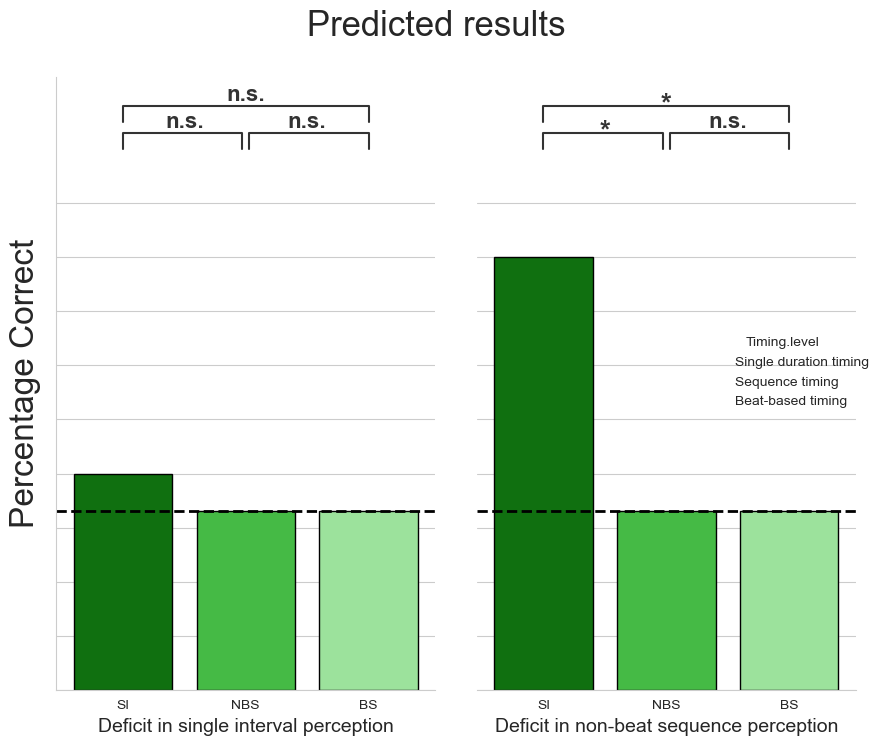

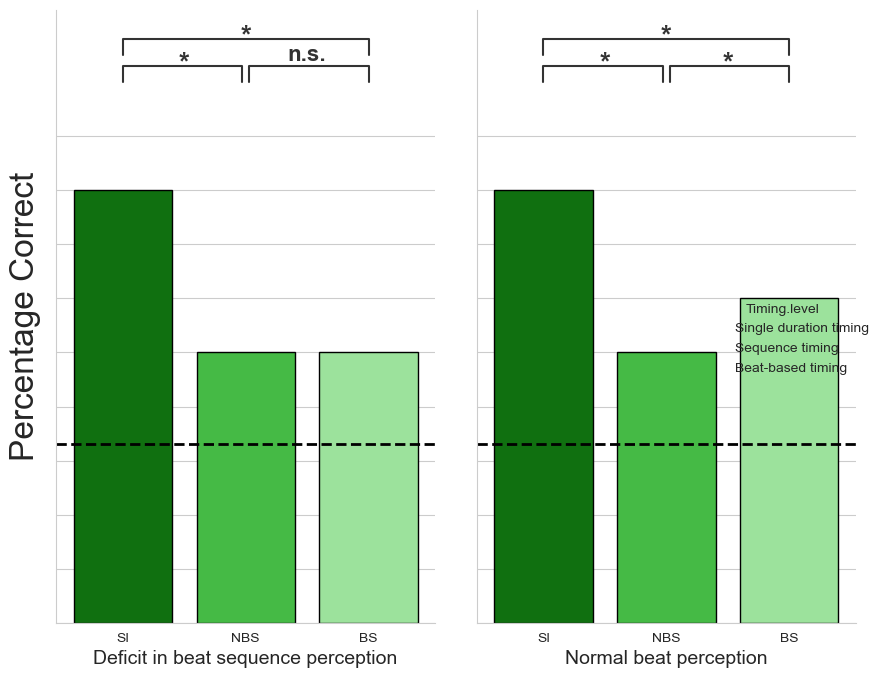

In [9]:
plt.figure(figsize=(3,4))
sns.set_style('whitegrid')

############# plot #############
g=sns.catplot(data=df_upper,x='Timing.level',y='value',kind='bar',col='Cluster',
              palette=['green','limegreen','lightgreen'],edgecolor="black", height=7, aspect=0.5,
              alpha=1, legend=True, sharey=True, sharex=True, margin_titles=False)
gg=sns.catplot(data=df_lower,x='Timing.level',y='value',kind='bar',col='Cluster',
              palette=['green','limegreen','lightgreen'],edgecolor="black", height=7, aspect=0.5,
              alpha=1, legend=True, sharey=True, sharex=True, margin_titles=False)

for i, ax in enumerate(g.axes.flat):
    cluster_name = g.col_names[i]

############ Aestetics ###############

for h in [g,gg]:
    h.fig.tight_layout()
    h.set_axis_labels("","Percentage Correct",size=24)
    h.set_titles('')
    h.set_titles(row_template='{row_name}',col_template='{col_name}')
    h.set_titles("")

    sns.despine(ax=g.axes[0, 1], left=True)

    h.set_xticklabels([]) # makes labels for each bar disappers
    h.set_yticklabels(size=13)
    h.axes[0,0].axhline(y=0.33, color='black', linestyle='--',lw=2)
    h.axes[0,1].axhline(y=0.33, color='black', linestyle='--',lw=2)
    h.set_xticklabels(['SI', 'NBS', 'BS']) 
g.axes[0,0].set_xlabel('Deficit in single interval perception',alpha=1,size=14)
g.axes[0,1].set_xlabel('Deficit in non-beat sequence perception',alpha=1,size=14)
gg.axes[0,0].set_xlabel('Deficit in beat sequence perception',alpha=1,size=14)
gg.axes[0,1].set_xlabel('Normal beat perception',alpha=1,size=14)
g.fig.suptitle('Predicted results',size=25, y=1.05)
############## legend ################
# new_labels = ['Single Intervals', 'Non-beat sequences','Beat sequences']
# handles_swarm, labels_swarm = g.axes[0, 0].get_legend_handles_labels()

# # Create a legend with custom icon colors
# legend_colors = ['green','limegreen','lightgreen']  # Replace with your desired colors

# custom_handles = [
#     plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markeredgecolor=color, markersize=11) if idx < 3
#     else plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markeredgecolor='black', markersize=14)
#     for idx, color in enumerate(legend_colors)
# ]

# dot_legend = plt.legend(custom_handles, new_labels, loc='upper left', bbox_to_anchor=(1, 1),
#                         frameon=False, fontsize=19, labelcolor='0.1', title='',title_fontsize=16)

# # Optionally, set the legend text (labels) color
# dot_legend.get_title().set_color('0.2')  

# from matplotlib.ticker import PercentFormatter
# g.axes[0,0].yaxis.set_major_formatter(PercentFormatter(1.0))

########### Statistical significance #################
# max_val=max(df_final['value'])
g.axes[0,0].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].text(x=0.5,y=max_val+0.04, s='n.s.',ha='center',size=16,weight='bold',color='0.2')
g.axes[0,0].text(x=1,y=max_val+0.09, s='n.s.',ha='center',size=16,weight='bold',color='0.2')
g.axes[0,0].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].text(x=1.5,y=max_val+0.04, s='n.s.',ha='center',size=16,weight='bold',color='0.2')

g.axes[0,1].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].text(x=0.5,y=max_val+0.02, s='*',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,1].text(x=1,y=max_val+0.07, s='*',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,1].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].text(x=1.5,y=max_val+0.04, s='n.s.',ha='center',size=16,weight='bold',color='0.2')

gg.axes[0,0].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
gg.axes[0,0].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
gg.axes[0,0].text(x=0.5,y=max_val+0.02, s='*',ha='center',size=20,weight='bold',color='0.2')
gg.axes[0,0].text(x=1,y=max_val+0.07, s='*',ha='center',size=20,weight='bold',color='0.2')
gg.axes[0,0].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
gg.axes[0,0].text(x=1.5,y=max_val+0.04, s='n.s.',ha='center',size=16,weight='bold',color='0.2')

gg.axes[0,1].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
gg.axes[0,1].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
gg.axes[0,1].text(x=0.5,y=max_val+0.02, s='*',ha='center',size=20,weight='bold',color='0.2')
gg.axes[0,1].text(x=1,y=max_val+0.07, s='*',ha='center',size=20,weight='bold',color='0.2')
gg.axes[0,1].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
gg.axes[0,1].text(x=1.5,y=max_val+0.02, s='*',ha='center',size=20,weight='bold',color='0.2')

# g.savefig(r'C:\Users\zhaleh\OneDrive\phd\PhD project\R code\plots\Predicted Results_2.png', bbox_inches='tight',dpi=400)
# gg.savefig(r'C:\Users\zhaleh\OneDrive\phd\PhD project\R code\plots\Predicted Results_3.png', bbox_inches='tight',dpi=400)

plt.show()


In [6]:
df1=df.iloc[:,:2].dropna()
df1['Cluster']='cluster1'
df1.rename(columns={'Cluster.1':'value'},inplace=True)
df2=df.iloc[:,2:4].dropna()
df2['Cluster']='cluster2'
df2.rename(columns={'Cluster.2':'value','Timing.level2':'Timing.level'},inplace=True)
df3=df.iloc[:,4:6].dropna()
df3['Cluster']='cluster3'
df3.rename(columns={'Cluster.3':'value','Timing.level3':'Timing.level'},inplace=True)
df4=df.iloc[:,6:8].dropna()
df4['Cluster']='cluster4'
df4.rename(columns={'Cluster.4':'value','Timing.level4':'Timing.level'},inplace=True)
predict=pd.concat([df1,df2,df3,df4],axis=0).reset_index(drop=True)
predict

,Timing.level,value,Cluster
0,Single duration timing,0.4,cluster1
1,Single duration timing,0.4,cluster1
2,Single duration timing,0.4,cluster1
3,Single duration timing,0.4,cluster1
4,Single duration timing,0.4,cluster1
...,...,...,...
115,Beat-based timing,0.6,cluster4
116,Beat-based timing,0.6,cluster4
117,Beat-based timing,0.6,cluster4
118,Beat-based timing,0.6,cluster4


<Figure size 300x400 with 0 Axes>

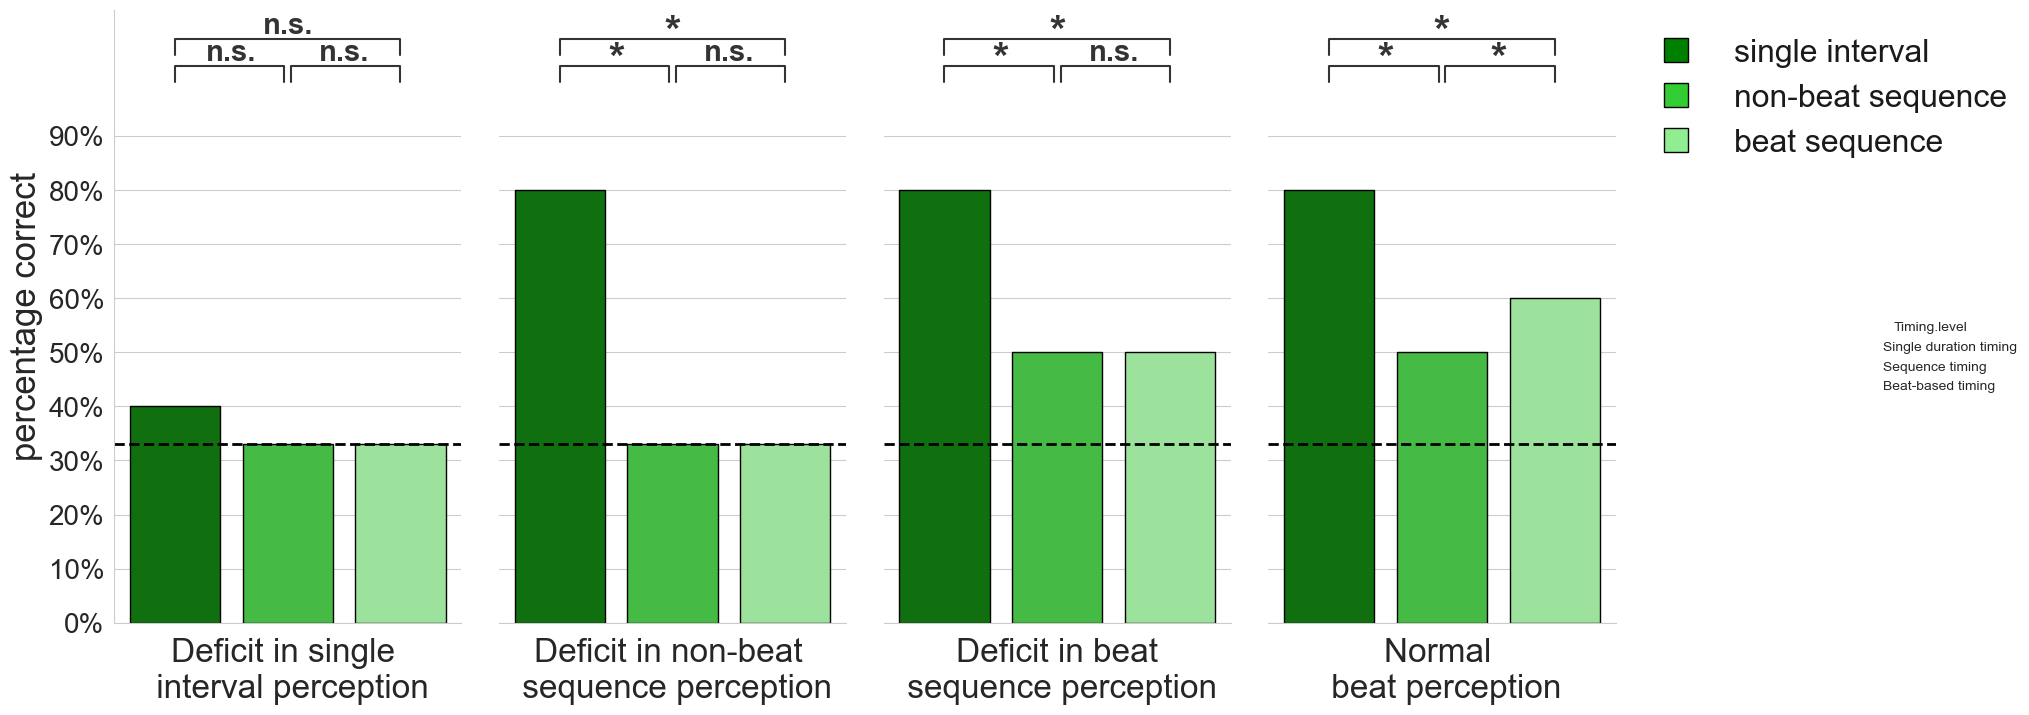

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(3,4))

############# plot #############
g=sns.catplot(data=predict,x='Timing.level',y='value',kind='bar',col='Cluster',
              palette=['green','limegreen','lightgreen'],edgecolor="black",
              height=7, aspect=0.5,alpha=1,
              legend=True, sharey=True, sharex=True, margin_titles=False)
colors = ['mediumblue', 'palevioletred', 'yellow']  # Example markers for the first, second, and third axes

# for i, ax in enumerate(g.axes.flat):
#     cluster_name = g.col_names[i]
#     sns.stripplot(ax=ax, x='Timing.level', y='value', data=predict[predict['Cluster'] == cluster_name],
#                   dodge=True, alpha=0.6, ec=colors[i], linewidth=0.8, size=10, color=colors[i])

############ Aestetics ###############
g.fig.tight_layout()
g.set_axis_labels("","percentage correct",size=25)
g.set_titles('')
g.axes[0,0].set_xlabel('Deficit in single \n interval perception',alpha=1,size=24)
g.axes[0,1].set_xlabel('Deficit in non-beat \n sequence perception',alpha=1,size=24)
g.axes[0,2].set_xlabel('Deficit in beat\n sequence perception',alpha=1,size=24)
g.axes[0,3].set_xlabel('Normal \n beat perception',alpha=1,size=24)

g.set_titles(row_template='{row_name}',col_template='{col_name}')
g.set_titles("")
# g.fig.suptitle('Predicted results',size=25, y=1.01)
sns.despine(ax=g.axes[0, 1], left=True)
sns.despine(ax=g.axes[0, 2], left=True)
sns.despine(ax=g.axes[0, 3], left=True)
g.set_xticklabels([]) # makes labels for each bar disappers
g.set_yticklabels(size=20)
g.axes[0,0].axhline(y=0.33, color='black', linestyle='--',lw=2)
g.axes[0,1].axhline(y=0.33, color='black', linestyle='--',lw=2)
g.axes[0,2].axhline(y=0.33, color='black', linestyle='--',lw=2)
g.axes[0,3].axhline(y=0.33, color='black', linestyle='--',lw=2)

############## legend ################
new_labels = ['single interval', 'non-beat sequence','beat sequence']
# handles_swarm, labels_swarm = g.axes[0, 0].get_legend_handles_labels()

# # Create a legend with custom icon colors
legend_colors = ['green','limegreen','lightgreen']  # Replace with your desired colors

custom_handles = [
#     plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markeredgecolor=color, markersize=11) if idx < 3
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markeredgecolor='black', markersize=17)
    for idx, color in enumerate(legend_colors)
]

dot_legend = plt.legend(custom_handles, new_labels, loc='upper left', bbox_to_anchor=(1, 1),
                        frameon=False, fontsize=23, labelcolor='0.1', title='',title_fontsize=16)

# # Optionally, set the legend text (labels) color
# dot_legend.get_title().set_color('0.2')  

from matplotlib.ticker import PercentFormatter
g.axes[0,0].yaxis.set_major_formatter(PercentFormatter(1.0))

########### Statistical significance #################
max_val= 1.0 #max(predict['value'])
from matplotlib.ticker import PercentFormatter
g.axes[0,0].yaxis.set_major_formatter(PercentFormatter(1.0))

g.axes[0,0].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].text(x=0.5,y=max_val+0.04, s='n.s.',ha='center',size=21,weight='bold',color='0.2')
g.axes[0,0].text(x=1,y=max_val+0.09, s='n.s.',ha='center',size=21,weight='bold',color='0.2')
g.axes[0,0].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].text(x=1.5,y=max_val+0.04, s='n.s.',ha='center',size=21,weight='bold',color='0.2')

g.axes[0,1].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].text(x=0.5,y=max_val+0.02, s='*',ha='center',size=30,weight='bold',color='0.2')
g.axes[0,1].text(x=1,y=max_val+0.07, s='*',ha='center',size=30,weight='bold',color='0.2')
g.axes[0,1].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].text(x=1.5,y=max_val+0.04, s='n.s.',ha='center',size=21,weight='bold',color='0.2')

g.axes[0,2].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,2].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
g.axes[0,2].text(x=0.5,y=max_val+0.02, s='*',ha='center',size=30,weight='bold',color='0.2')
g.axes[0,2].text(x=1,y=max_val+0.07, s='*',ha='center',size=30,weight='bold',color='0.2')
g.axes[0,2].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,2].text(x=1.5,y=max_val+0.04, s='n.s.',ha='center',size=21,weight='bold',color='0.2')

g.axes[0,3].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,3].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
g.axes[0,3].text(x=0.5,y=max_val+0.02, s='*',ha='center',size=30,weight='bold',color='0.2')
g.axes[0,3].text(x=1,y=max_val+0.07, s='*',ha='center',size=30,weight='bold',color='0.2')
g.axes[0,3].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,3].text(x=1.5,y=max_val+0.02, s='*',ha='center',size=30,weight='bold',color='0.2')

### png format
g.savefig(r'C:/Users/zhaleh/PhD_Projects/Hierarchy_to_Beat_Perception_Auditory_Visual/plots/redicted Results.png', bbox_inches='tight',dpi=400)

### tif format
# tif_path = 'C:/Users/zhaleh/PhD_Projects/Hierarchy_to_Beat_Perception_Auditory_Visual/plots/redicted Results.tif'
# plt.savefig(tif_path, bbox_inches='tight', dpi=600)
plt.show()
